# Precision-Recall curve

Basically looks at all possible decision threeholds given a soft decision. the soft decision can be a probability estimate 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['savefig.dpi'] =300
plt.rcParams['savefig.bbox'] = 'tight'
np.set_printoptions(precision =3, suppress = True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve

In [7]:
X, y = make_blobs(n_samples=(2500, 500), 
                  cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

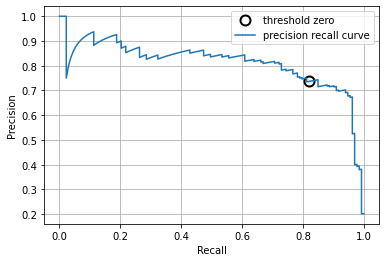

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

#find threshold closest to zero:

close_zero = np.argmin(np.abs(thresholds))
plt.plot(recall[close_zero], precision[close_zero], 'o', markersize=10,
        label='threshold zero', fillstyle='none', c= 'k', mew=2)
plt.plot(recall, precision, label='precision recall curve')
plt.ylabel('Precision')
plt.grid()
plt.xlabel('Recall')
plt.legend(loc='best')
plt.savefig('precision_recall_curve.png')

# Comparing SVM and RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=0)

From the comparism SVC has better precision-recall than rf


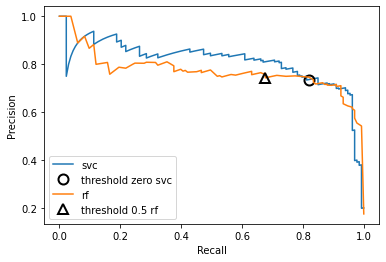

In [27]:
# RandomForestClassifier has predict_proba, but not decision_function

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:,1])

plt.plot(recall, precision, label='svc')

plt.plot(recall[close_zero], precision[close_zero], 'o', markersize=10,
        label='threshold zero svc', fillstyle='none', c='k', mew=2 )
plt.plot(recall_rf, precision_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(recall_rf[close_default_rf], precision_rf[close_default_rf], '^',
        c='k', markersize=10, label='threshold 0.5 rf', fillstyle='none', mew=2)

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.savefig('rf_vs_svc.png')
print('From the comparism SVC has better precision-recall than rf')

# F1 vs average precision

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. ... F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
* Definition. Average precision is a measure that combines recall and precision for ranked retrieval results. For one information need, the average precision is the mean of the precision scores after each relevant document is retrieved.

In [28]:
from sklearn.metrics import f1_score

print('f1_score of random forest: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))

print('f1_score of svc: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.711
f1_score of svc: 0.776


In [29]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print('Average precision of random forest: {:.3f}'.format(ap_rf))
print('Average precision of svc: {:.3f}'.format(ap_svc))

Average precision of random forest: 0.770
Average precision of svc: 0.813


# ROC CURVE

A **receiver operating characteristic curve, or ROC curve**, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The method was originally developed for operators of military radar receivers, which is why it is so named

* The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. ... The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

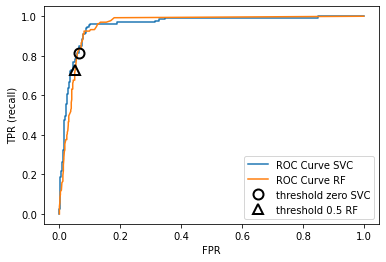

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

close_zero = np.argmin(np.abs(thresholds))

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)